In [1]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams["figure.dpi"] = 160

import tensorflow.keras as keras
from tensorflow.keras.layers import Input, LSTM, Dense
from IPython.display import clear_output

from sklearn.model_selection import train_test_split

from slider import Preprocessing, Settings, Visualization
from slider import ImageAnalysis, ParticleAnalysis, NetworkAnalysis, CommunityAnalysis, Analyze

In [2]:
photoelasticImageData, whiteLightImageData, forceData, trackingData, metadata = Preprocessing.loadSliderData(loadCachedData=True)
peakTimes = Preprocessing.identifyPeaks(forceData, returnTimes=True)
timeArr = forceData[0][:,1]

Reading tracking data from cache: Cache/Tracking/shape0_01.pickle


In [3]:
metrics = [ImageAnalysis.varianceBrightness, ImageAnalysis.averageBrightness,
           CommunityAnalysis.averageCommunitySize, CommunityAnalysis.numberOfCommunities]

metricList = np.array(Analyze.analyze(photoelasticImageData, trackingData, metrics, metadata)[0])

Reading analysis result from cache: Cache/Analysis/shape_01_numberOfCommunities_21997.pickle
Reading analysis result from cache: Cache/Analysis/shape_01_averageCommunitySize_21997.pickle
Reading analysis result from cache: Cache/Analysis/shape_01_averageBrightness_21997.pickle
Reading analysis result from cache: Cache/Analysis/shape_01_varianceBrightness_21997.pickle


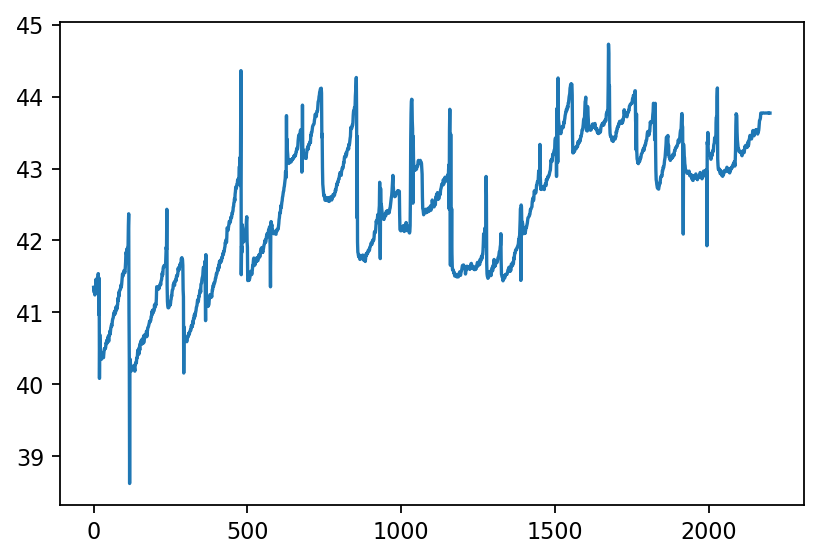

In [83]:
plt.plot(metricList[1,:])

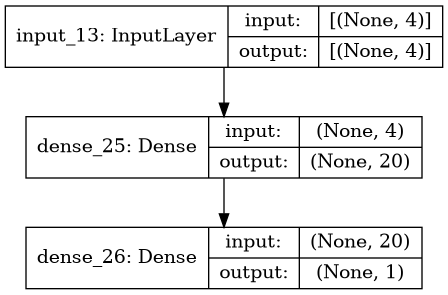

In [33]:
model = keras.Sequential()

model.add(Input(shape=(len(metrics))))
#model.add(LSTM(sL, activation='tanh'))
model.add(Dense(20, activation='linear'))
model.add(Dense(1, activation='linear'))

model.compile(optimizer='adam', loss='mse', metrics=['accuracy'])
keras.utils.plot_model(model, show_shapes=True)

(19796, 4)
(19796,)
Epoch 1/25
619/619 [==============================] - 0s 471us/step - loss: 0.0990 - accuracy: 0.0000e+00
Epoch 2/25
619/619 [==============================] - 0s 473us/step - loss: 0.1001 - accuracy: 0.0000e+00
Epoch 3/25
619/619 [==============================] - 0s 514us/step - loss: 0.1140 - accuracy: 0.0000e+00
Epoch 4/25
619/619 [==============================] - 0s 508us/step - loss: 0.0925 - accuracy: 0.0000e+00
Epoch 5/25
619/619 [==============================] - 0s 506us/step - loss: 0.1093 - accuracy: 0.0000e+00
Epoch 6/25
619/619 [==============================] - 0s 495us/step - loss: 0.1064 - accuracy: 0.0000e+00
Epoch 7/25
619/619 [==============================] - 0s 553us/step - loss: 0.1226 - accuracy: 0.0000e+00
Epoch 8/25
619/619 [==============================] - 0s 511us/step - loss: 0.0958 - accuracy: 0.0000e+00
Epoch 9/25
619/619 [==============================] - 0s 480us/step - loss: 0.0966 - accuracy: 0.0000e+00
Epoch 10/25
619/619 [=====

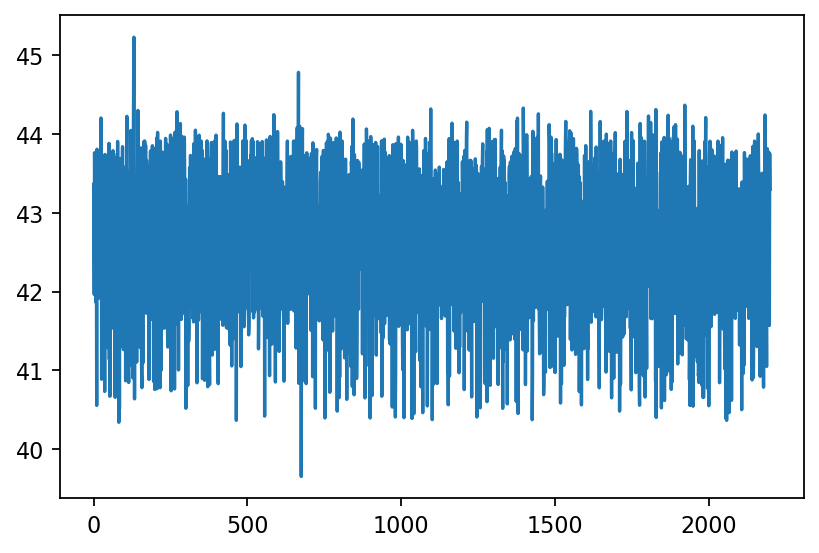

In [36]:
# Train on sequences of variables to predict the next value of one of them
predictionMetricIndex = 1 # Predict the average brightness

inputMetrics = np.array([metricList[:,i] for i in range(len(metricList[0])-1)])
outputMetric = np.array([metricList[predictionMetricIndex,i] for i in range(len(metricList[0])-1)])
#outputMetric = forceData[0][:-1,2] - forceData[0][1:,2]

trainingInput, validationInput, trainingOutput, validationOutput = train_test_split(inputMetrics, outputMetric, test_size=0.1, random_state=None)
print(np.shape(trainingInput))
print(np.shape(trainingOutput))

#plt.plot(trainingOutput, 'o')

model.fit(trainingInput, trainingOutput, epochs=25)
accuracy = model.evaluate(validationInput, validationOutput)[1]

plt.plot(model(validationInput))
print(accuracy)